## Task 1: Prediction using Supervised ML.

### Name: Rahul Singh

### Domain: Data Science & Business Analytics

### Problem Statement: Predict the percentage of a student based on the number of study hours using Linear Regression.

In [1]:
# Importing warnings library to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing relevant libraries for data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading and Understanding the dataset

In [3]:
data_link= 'http://bit.ly/w-data'
data= pd.read_csv(data_link)
data.head() # Displaying first five rows of data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Checking the shape of data
data.shape

(25, 2)

### Insight: There are only 25 data points and two columns in the data set.

In [5]:
# checking the columns name in the dataset
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [6]:
# Checking the basic information on dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Insight:
1. There are no missing values.
2. Both the columns are numerical in nature.




In [7]:
# checking the statistical information about dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Insight:
1. The range of Hours column is 1.1 hrs to 9.2 hrs.
2. The range of Scores column varies from 17 to 95.

## Data Visualization

In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Uni-Variate Analysis

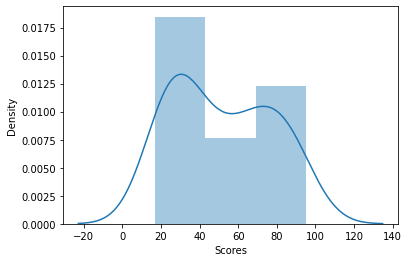

In [9]:
#Plotting distplot for column- 'Scores'
sns.distplot(data['Scores'])
plt.show()

### Insights:

1. The distribution seems to be slightly right skewed.
2. The datapoints in the range of 20 to 40 is dominating. 

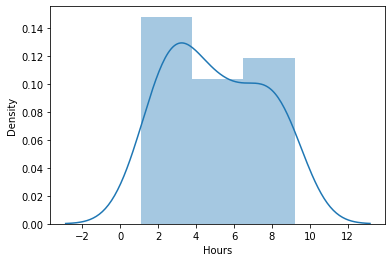

In [10]:
# Visualising the Hours column
sns.distplot(data['Hours'])
plt.show()

### Insights:

1. The distribution seems to be slightly right skewed.
2. The datapoints in the range of 1 to 4 is slightly dominating. 

### Bi-Variate Analysis: Relationship between Study Hours and Scores

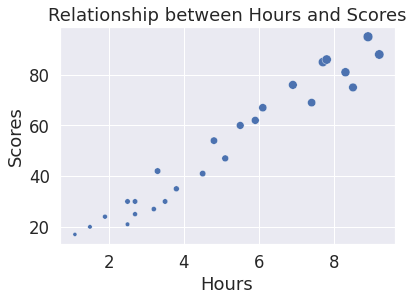

In [11]:
# Visualizing the relationship between Hours and Scores column
sns.set(font_scale=1.5)
plt.figure(figsize= (6,4))
sns.scatterplot(data= data, x= 'Hours', y= 'Scores', s=data['Scores'])
plt.title("Relationship between Hours and Scores")
plt.show()

### Insight: There is a linear relationship between Hours and Scores. So, Linear regression method can be applied for making predictions.

### Data Preparation for building model

There are two variables in the dataset- Hours and Scores

We have to predict the scores of a student given the hours per day.

So, Hours is the independent variable and Scores is the dependent variable.

In [12]:
# Creating the X and y for data

y= data.pop('Scores')
X= data

In [13]:
# Checking the shape of X and y
print("The shape of X is ", X.shape)
print("The shape of y is ", y.shape)

The shape of X is  (25, 1)
The shape of y is  (25,)


In [14]:
# Splitting the dataset in train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state=17)

In [15]:
# Importing statsmodel for examining better statistical measurements
import statsmodels.api as sm

In [16]:
X_stat= sm.add_constant(X_train) # adding the constant term
stat_model= sm.OLS(y_train, X_stat).fit() #fitting the model
print(stat_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     295.0
Date:                Tue, 17 Aug 2021   Prob (F-statistic):           2.83e-11
Time:                        17:53:27   Log-Likelihood:                -54.034
No. Observations:                  17   AIC:                             112.1
Df Residuals:                      15   BIC:                             113.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5609      3.383      0.757      0.4

### Insights:
1. Both R-Squared and Adjusted R-Squared values are very close approximately 95 % that means the variable is explaining 95 % of variance in the data and which implies the good strength of model.

2. F-Statistics probability is very less than 0.05, which indicates that overall model fit is significant.



### Using Sklearn's Linear Regression model

In [17]:
# Importing Linear Regression model from Sklearn library
from sklearn.linear_model import LinearRegression

In [18]:
X_train.head()

,Hours
3,8.5
2,3.2
10,7.7
8,8.3
9,2.7


In [19]:
y_train.head()

3     75
2     27
10    85
8     81
9     25
Name: Scores, dtype: int64

In [20]:
# Fitting the model
LR_model= LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#Predicting on training dataset
y_train_predict= LR_model.predict(X_train)
y_train_predict

array([85.63429766, 33.83559229, 77.81562516, 83.67962954, 28.94892197,
       13.31157696, 52.4049395 , 69.99695265, 46.54093512, 56.31427576,
       36.76759448, 34.81292636, 26.99425385, 92.47563611, 78.79295922,
       21.13024946, 89.54363392])

In [22]:
# Evaluating the model
train_prediction= pd.DataFrame({"X_train_actual": np.ravel(X_train),
                                "y_train_actual": np.ravel(y_train),
                                "y_train_prediction": np.ravel(y_train_predict)})
train_prediction.head()

,X_train_actual,y_train_actual,y_train_prediction
0,8.5,75,85.634298
1,3.2,27,33.835592
2,7.7,85,77.815625
3,8.3,81,83.679630
4,2.7,25,28.948922


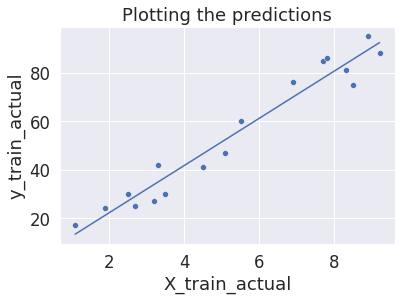

In [23]:
# Visualizing the training model
# Plotting the model 
sns.set(font_scale=1.5)
plt.figure(figsize= (6,4))
sns.scatterplot(x= train_prediction['X_train_actual'], y= train_prediction['y_train_actual'])
sns.lineplot(x= train_prediction['X_train_actual'], y= train_prediction['y_train_prediction'])
plt.title("Plotting the predictions")
plt.show()

In [24]:
# Checking the metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Squared Error on training dataset: ", mean_squared_error(y_train, y_train_predict))
print("Mean Absolute Error on training dataset: ", mean_absolute_error(y_train, y_train_predict))

Mean Squared Error on training dataset:  33.75371853865284
Mean Absolute Error on training dataset:  5.445593727208556


### Checking the assumption of Linear Regression

#### Assumption 1: There should be a linear relationship between Dependent Variable and Independent Variables

##### As we have already seen above using scatter plot, there is a linear relationship between Hours and Scores variable.

#### Assumption 2: Normal distribution of Error terms, i.e. mean of error terms should be zero.

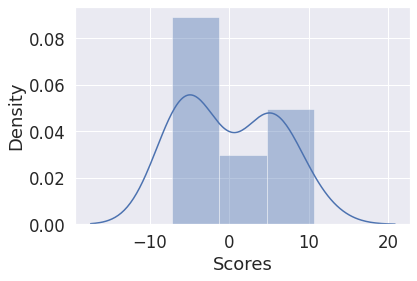

In [25]:
# Calculating residual error terms for training dataset and plotting a distplot
res= y_train_predict-y_train
sns.distplot(res)
plt.show()

In [26]:
# Calculating mean value of error terms
mean_value= np.mean(res)
print("The mean of errors is ", mean_value)

The mean of errors is  -3.761696836377001e-15


##### The mean error is approximately 0.

### Assumption 3: Independence of error terms

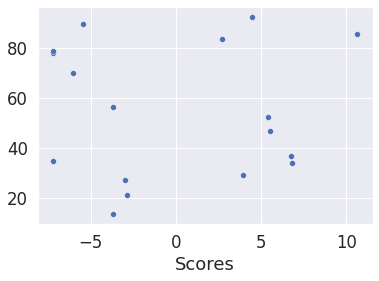

In [27]:
#Plotting a scatter plot
sns.scatterplot(res, y_train_predict)
plt.show()

##### From the above scatter plot, error terms seems to have no visible pattern

#### Assumption 4: Check for Homoscedasticity

##### From the above distplot, error terms seems to have normal distribution that means it has constant variance hence homoscedasticity.

### All the assumptions seems to be validated.

### Making prediction on Test dataset

In [28]:
#Predicting on training dataset
y_test_predict= LR_model.predict(X_test)
y_test_predict

array([28.94892197, 26.99425385, 62.17828014, 74.88362296, 17.22091321,
       60.22361201, 49.47293731, 39.69959667])

## Model Evaluation

In [29]:
# Evaluating the model
test_prediction= pd.DataFrame({"X_test_actual": np.ravel(X_test),
                                "y_test_actual": np.ravel(y_test),
                                "y_test_prediction": np.ravel(y_test_predict)})
test_prediction.head()

,X_test_actual,y_test_actual,y_test_prediction
0,2.7,30,28.948922
1,2.5,21,26.994254
2,6.1,67,62.178280
3,7.4,69,74.883623
4,1.5,20,17.220913


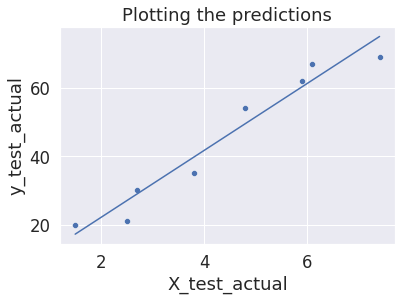

In [30]:
# Visualizing the training model
# Plotting the model 
sns.set(font_scale=1.5)
plt.figure(figsize= (6,4))
sns.scatterplot(x= test_prediction['X_test_actual'], y= test_prediction['y_test_actual'])
sns.lineplot(x= test_prediction['X_test_actual'], y= test_prediction['y_test_prediction'])
plt.title("Plotting the predictions")
plt.show()

In [31]:
# Checking the metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("Mean Squared Error on test dataset: ", mean_squared_error(y_test, y_test_predict))
print("Mean Absolute Error on test dataset: ", mean_absolute_error(y_test, y_test_predict))

Mean Squared Error on test dataset:  18.545153623454564
Mean Absolute Error on test dataset:  3.9416011054125395


### The mean absolute error on test dataset is 3.94

## Prediction on user's data

In [32]:
hours= float(input("Enter no. of hours: "))
max_score= 100.0
score= LR_model.predict(np.array(hours).reshape(-1,1))
if score <= max_score: 
  score= LR_model.predict(np.array(hours).reshape(-1,1))
  print("If you study for {0} hours per day".format(hours))
  print("Your predicted score is {0}".format(score[0]))
else:
  print("Invalid input")

Enter no. of hours: 9.25
If you study for 9.25 hours per day
Your predicted score is 92.96430314196084


# Thank You